In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from PIL import Image


### Load the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Resize the images to 32x32 using the PIL library

In [ ]:
x_train_resized = []
for img in x_train:
    img = Image.fromarray(img)
    img = img.resize((32, 32))
    img = np.array(img)
    x_train_resized.append(img)
x_train_resized = np.array(x_train_resized)

x_test_resized = []
for img in x_test:
    img = Image.fromarray(img)
    img = img.resize((32, 32))
    img = np.array(img)
    x_test_resized.append(img)
x_test_resized = np.array(x_test_resized)

### Reshape the input data to 4D array

In [ ]:
x_train_resized = x_train_resized.reshape(x_train_resized.shape[0], 32, 32, 1)
x_test_resized = x_test_resized.reshape(x_test_resized.shape[0], 32, 32, 1)

### Define image size and batch size

In [ ]:
img_size = 32
batch_size = 32

### Define data augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

### Define the input shape

In [ ]:
inputs = Input(shape=(32, 32, 1))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


### Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [ ]:
history = model.fit(train_datagen.flow(x_train_resized, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train_resized) // batch_size,
                    epochs=10,
                    validation_data=val_datagen.flow(x_test_resized, y_test, batch_size=batch_size),
                    validation_steps=len(x_test_resized) // batch_size)

### Evaluate the model on the test data

In [ ]:
score = model.evaluate(test_datagen.flow(x_test_resized, y_test, batch_size=batch_size))

### Results

In [2]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 1.0250 - accuracy: 0.6469 - val_loss: 0.3515 - val_accuracy: 0.8849
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.6523 - accuracy: 0.7827 - val_loss: 0.2764 - val_accuracy: 0.9111
Epoch 3/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.5481 - accuracy: 0.8205 - val_loss: 0.2019 - val_accuracy: 0.9296
Epoch 4/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.4792 - accuracy: 0.8452 - val_loss: 0.1671 - val_accuracy: 0.9487
Epoch 5/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4347 - accuracy: 0.8599 - val_loss: 0.1607 - val_accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3923 - accuracy: 0.8741 - val_loss: 0.1434 - val_accuracy: 0.9553
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.3650 - accuracy: 0.8831 - val_loss: 0.1462 -

### Plot the loss and accuracy curves

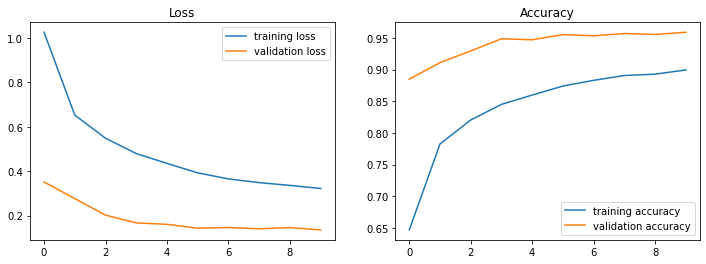

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()